## Missing Pattern Matrix 

In [1]:
import pandas as pd
import numpy as np

data = {
    'age': [25, 30, 28, 40, 22, 35, 32, 26, 27, 38],
    'income': [50000, 60000, 58000, 61000, 52000, 59000, 57000, 56000, 62000, 54000],
    'gender': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F']
}

df = pd.DataFrame(data)

# Introduce MAR pattern (e.g., hide age for high incomes instance)
df.loc[df['income'] > 58000, 'age'] = np.nan

df.head()

,age,income,gender
0,25.0,50000,M
1,NaN,60000,F
2,28.0,58000,M
3,NaN,61000,F
4,22.0,52000,F


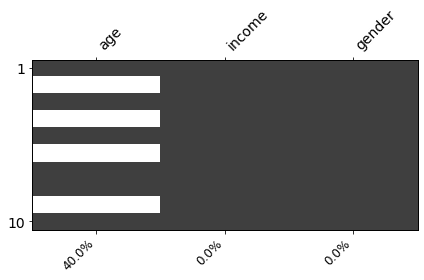

In [2]:
from missmecha.visual import plot_missing_matrix

plot_missing_matrix(df, color=False)

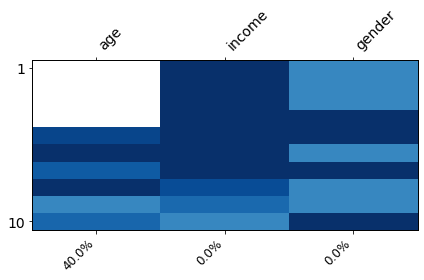

In [3]:
plot_missing_matrix(df, sort_by = "income")

### Time series sorting

In [4]:
from missmecha.generator import MissMechaGenerator

values = np.random.normal(loc=50, scale=10, size=(20, 10))

# Introduce missing pattern via MissMechaGenerator
mecha = MissMechaGenerator()
X_missing = mecha.fit_transform(values)

df_ts = pd.DataFrame(X_missing,
                  index=pd.date_range('1/1/2011', periods=20, freq='D').strftime('%Y-%m-%d'))

df_ts.head()

,0,1,2,3,4,5,6,7,8,9
2011-01-01,45.661595,54.728763,NaN,53.530250,50.477685,65.901041,48.136867,44.824397,41.319347,NaN
2011-01-02,71.277618,35.243430,36.512284,52.300867,51.087189,49.217936,NaN,46.914361,61.584414,46.028141
2011-01-03,59.641112,39.738529,53.322909,41.104701,61.936548,35.096993,56.558619,36.248743,NaN,52.164738
2011-01-04,69.022090,NaN,56.692099,30.369284,66.828208,68.233890,NaN,38.112682,30.728199,NaN
2011-01-05,55.896794,44.888782,59.987482,46.965391,54.168732,41.402343,41.679894,45.710272,NaN,49.577129


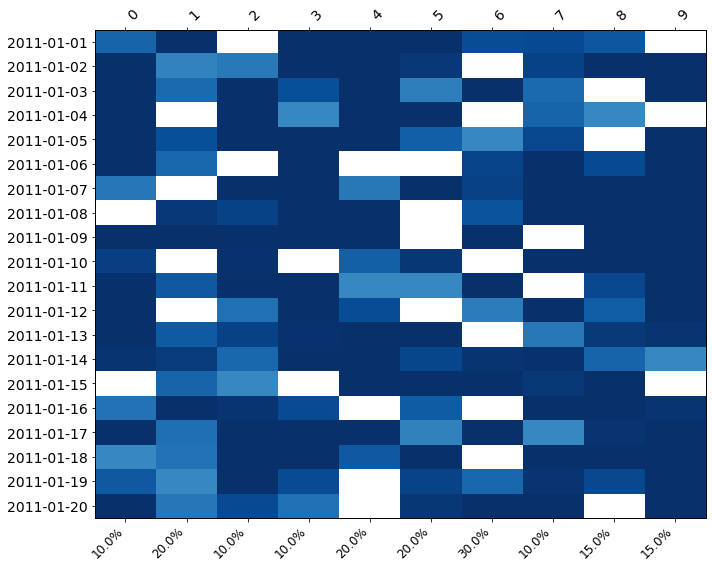

In [5]:
plot_missing_matrix(df_ts,ts = True,figsize=(10, 8))

## Nullity Correlation Heatmap

In [6]:
data_mixed = pd.DataFrame({
    "DATE": ["09/10/2016", "03/31/2016", "03/16/2016", "04/01/2016", np.nan, "04/03/2016"],
    "TIME": ["12:09:00", "22:10:00", "14:58:00", np.nan, "08:30:00", "19:00:00"],
    "BOROUGH": ["QUEENS", "BROOKLYN", "MANHATTAN", "QUEENS", "BRONX", np.nan],
    "ZIP CODE": ["11427", "11223", "10001", "11434", np.nan, "10010"],
    "LATITUDE": [40.724692, 40.598761, 40.712776, np.nan, 40.850000, 40.755000],
    "LONGITUDE": [-73.874245, -73.987843, -74.006058, -73.900000, -73.880000, np.nan],
    "VEHICLE TYPE": ["BICYCLE", "PASSENGER VEHICLE", "TAXI", "SUV", np.nan, "BICYCLE"]
})
data_mixed.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,VEHICLE TYPE
0,09/10/2016,12:09:00,QUEENS,11427,40.724692,-73.874245,BICYCLE
1,03/31/2016,22:10:00,BROOKLYN,11223,40.598761,-73.987843,PASSENGER VEHICLE
2,03/16/2016,14:58:00,MANHATTAN,10001,40.712776,-74.006058,TAXI
3,04/01/2016,NaN,QUEENS,11434,NaN,-73.900000,SUV
4,NaN,08:30:00,BRONX,NaN,40.850000,-73.880000,NaN


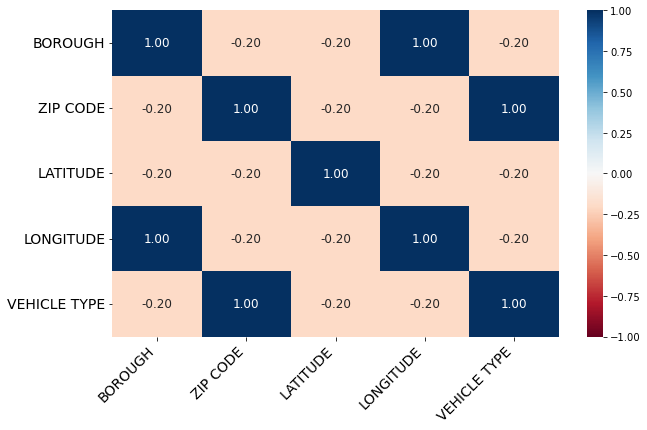

In [7]:
from missmecha.visual import plot_missing_heatmap

plot_missing_heatmap(data_mixed, method = "kendall", figsize=(10, 6))